First few rows of the data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Shape: (150, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    f

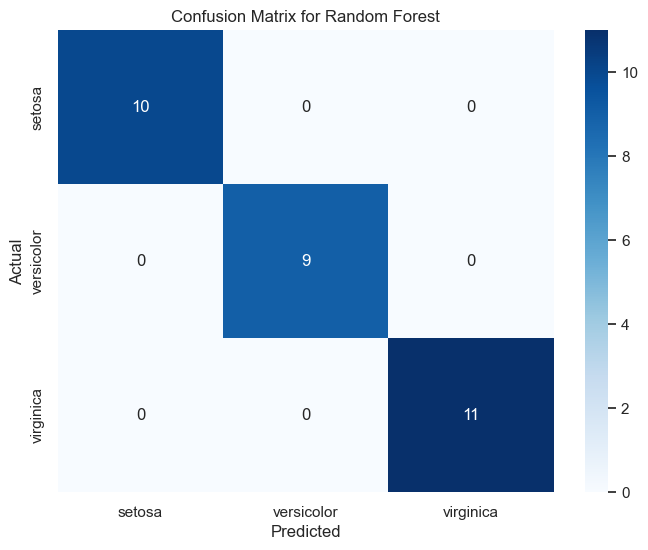

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Iris Dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

# 2. Explore the Data
print("First few rows of the data:")
print(data.head())
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

# 3. Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 4. Splitting the Data into Features and Target
X = data.drop(columns=['species'])
y = data['species']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train Classification Models

# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 8. Model Evaluation
# Logistic Regression Evaluation
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# K-Nearest Neighbors Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Random Forest Evaluation
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 9. Visualizing Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 10. Conclusion
# Based on the classification report and accuracy, choose the best model


<Figure size 800x600 with 0 Axes>

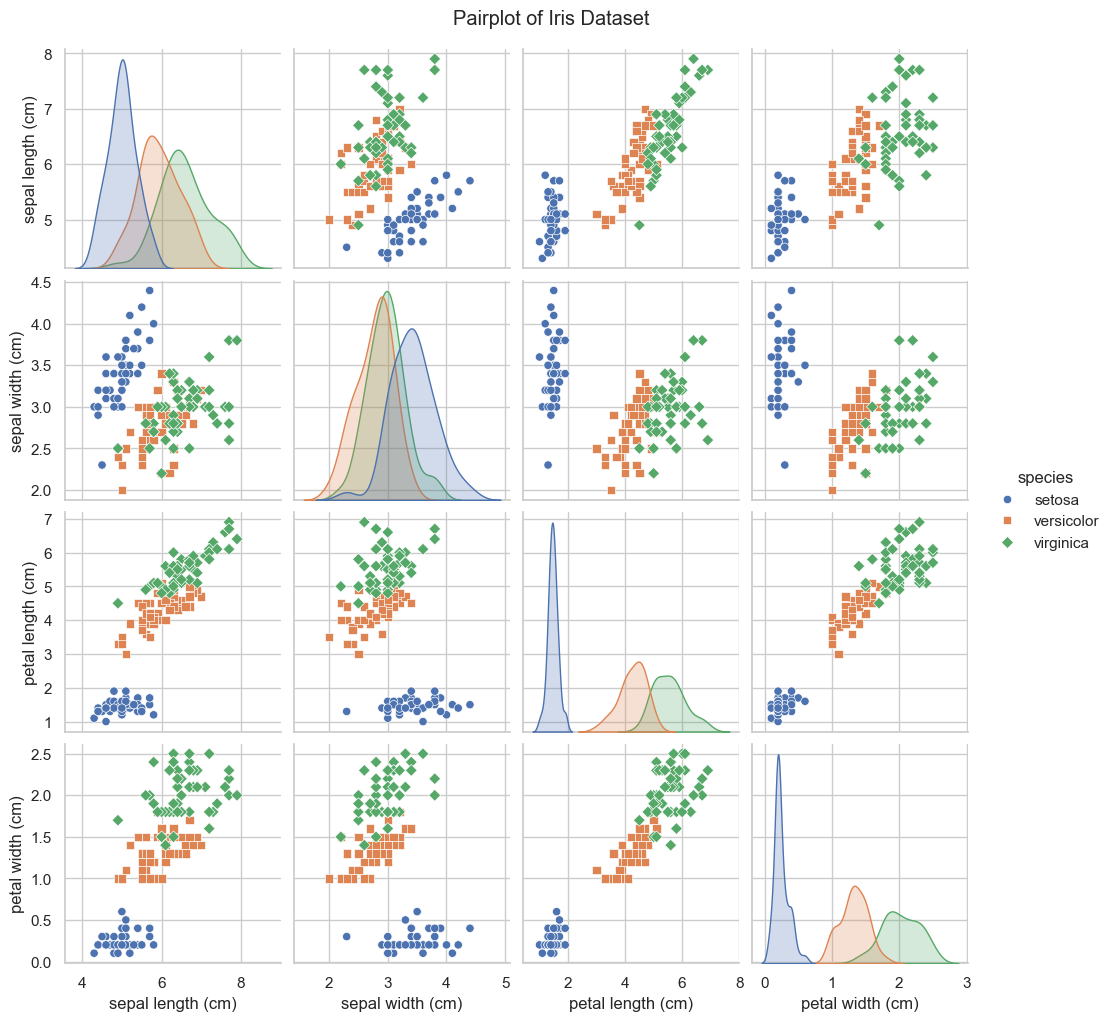

In [22]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for plots
sns.set(style="whitegrid")

# 1. Pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(data, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()








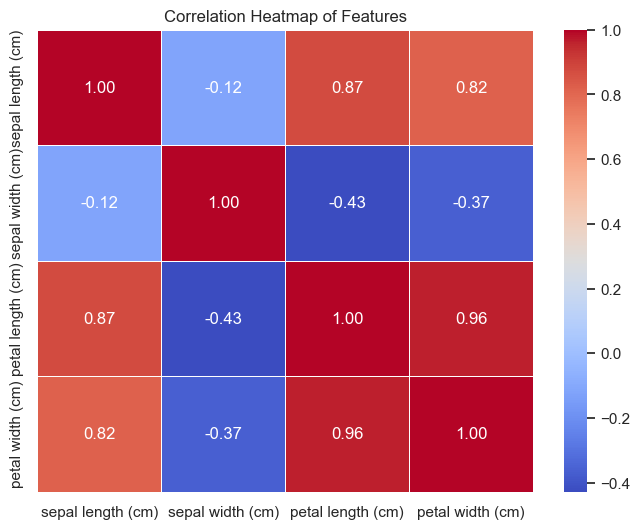

In [23]:
# 2. Correlation Heatmap
correlation_matrix = data.drop(columns='species').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

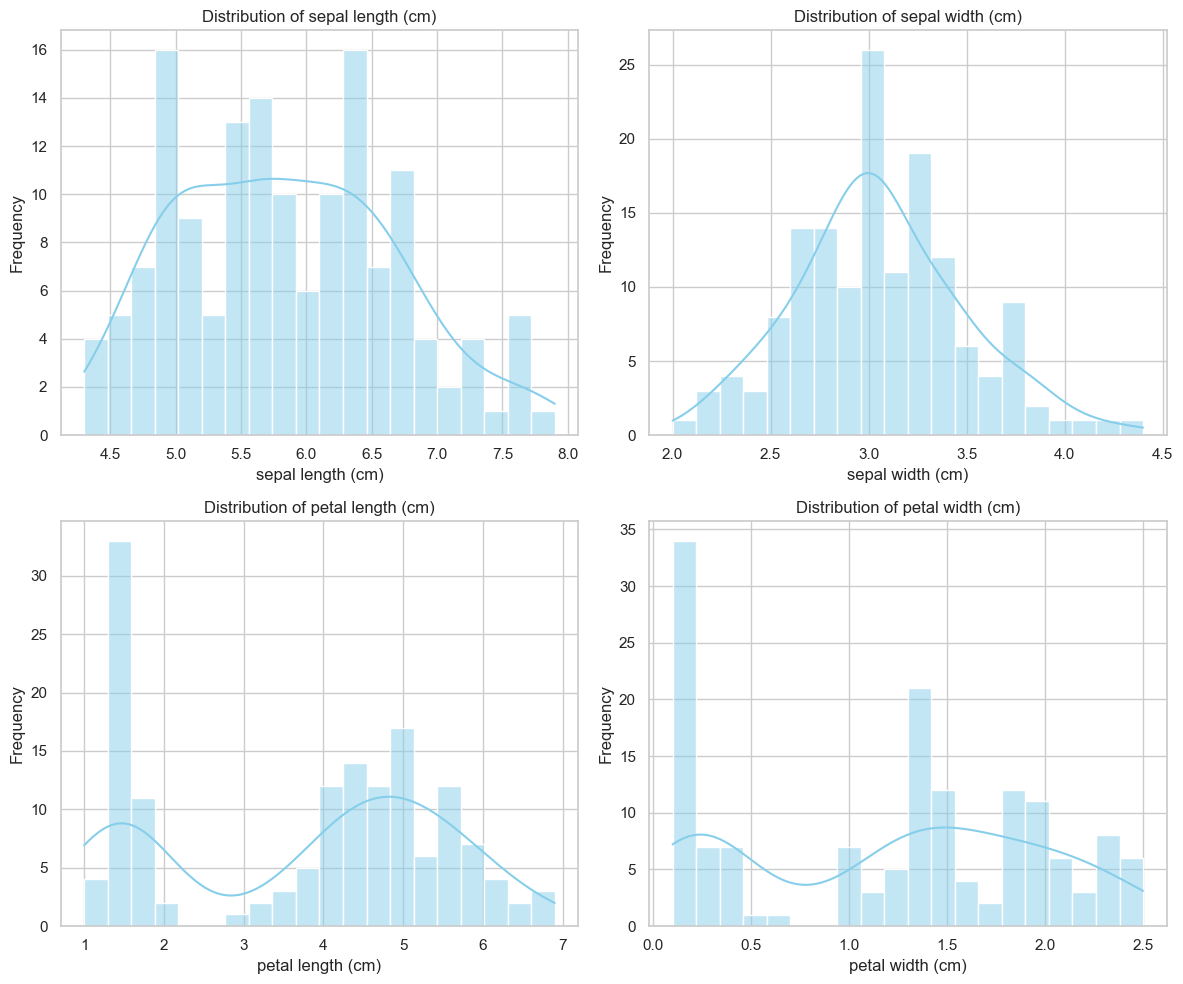

In [24]:
# 3. Histograms for each feature
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

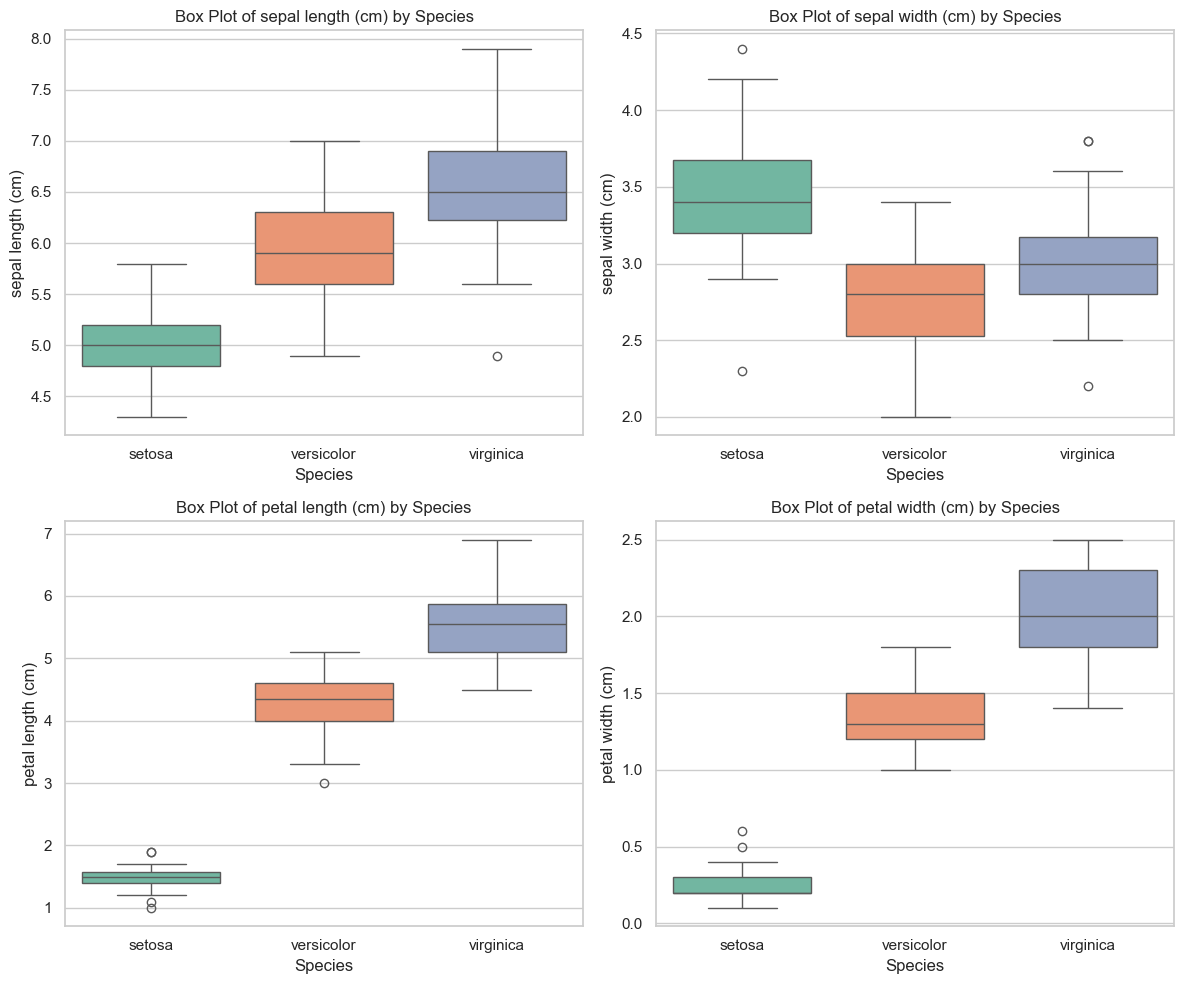

In [25]:
# 4. Boxplot for each feature by species
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="species", y=feature, data=data, hue="species", palette="Set2", legend=False)
    plt.title(f"Box Plot of {feature} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


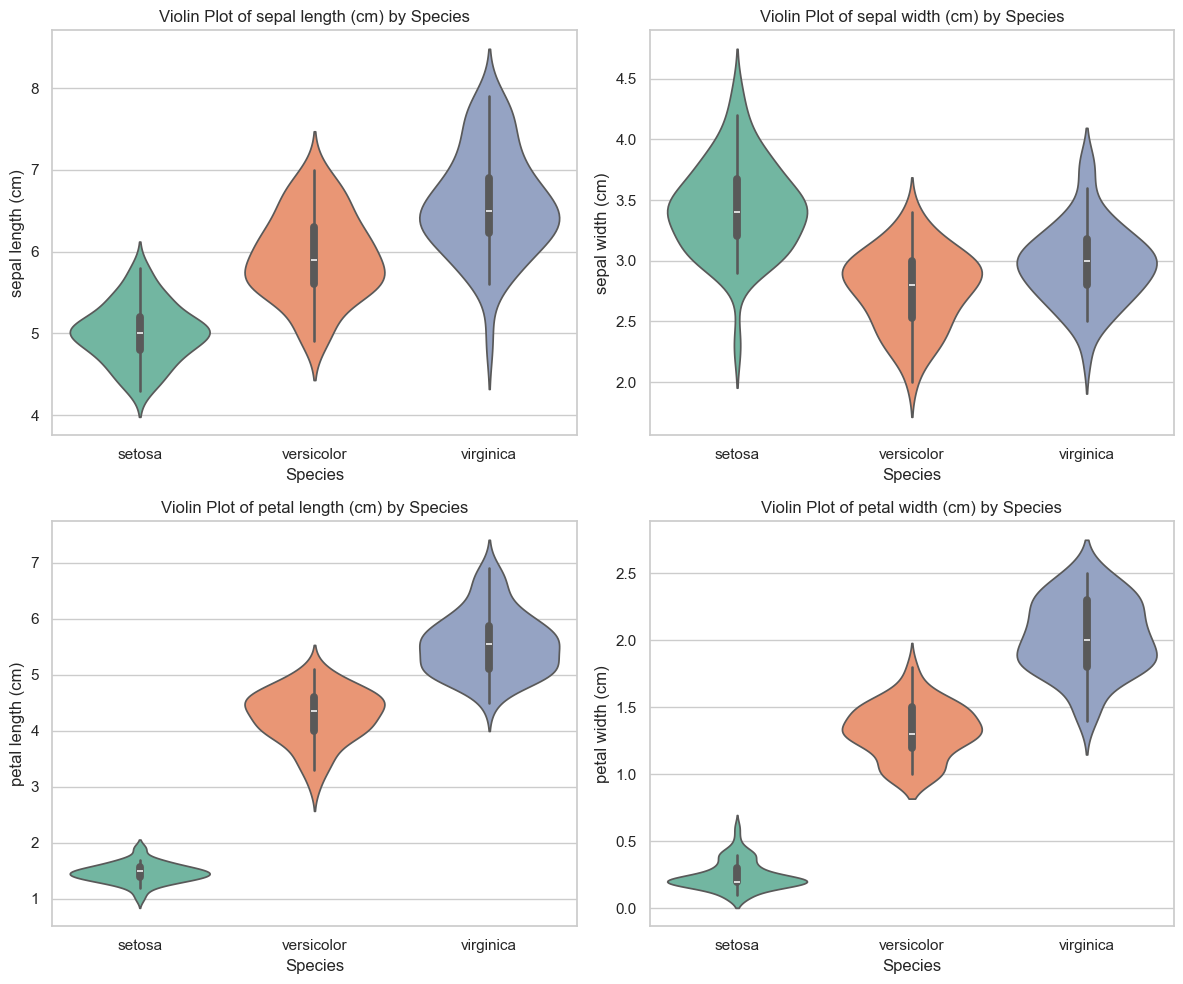

In [26]:
# violin plot
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x="species", y=feature, data=data, hue="species", palette="Set2", legend=False)
    plt.title(f"Violin Plot of {feature} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
